In [ ]:
import pandas as pd

# Load the cleaned dataset
data_clean = pd.read_csv('../data/processed/cleaned_heart_data.csv')



In [4]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import shap

# Separate features (X) and target (y)
y = data_clean['HeartDisease']
X = data_clean.drop('HeartDisease', axis=1)


In [5]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#baseline - 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBP', 'RestingECG'
#stress test - 'MaxHR', 'Oldpeak', 'ExerciseAngina', 'ST_Slope'

#Age and Sex are in all three subsets

#Just baseline
X_train1 = X_train.drop(columns = ['MaxHR', 'Oldpeak', 'ExerciseAngina', 'ST_Slope'])       

#Just stress test data
X_train2 = X_train.drop(columns = ['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG'])   

#All features
X_train3 = X_train

In [7]:
X_test1 = X_test.drop(columns = ['MaxHR', 'Oldpeak', 'ExerciseAngina', 'ST_Slope'])     
X_test2 = X_test.drop(columns = ['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG'])   
X_test3 = X_test

In [10]:

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features1),
        ('cat', OneHotEncoder(), cat_features1)
    ],
    remainder='passthrough'
)

# Define models and parameters for grid search
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000)
}

params = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10, 100]},
    'Random Forest': {'classifier__n_estimators': [10, 50, 100], 'classifier__max_depth': [None, 10, 20, 30]},
    'Neural Network': {'classifier__hidden_layer_sizes': [(50,), (100,), (100, 100)], 'classifier__alpha': [0.0001, 0.001, 0.01]} 
}

best_model = None
best_params = None
best_score = 0
best_model_name = ""

# Perform grid search
for model_name in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[model_name])
    ])
    
    grid = GridSearchCV(estimator=pipeline, param_grid=params[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train1, y_train)
    
    score = grid.best_score_
    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_model_name = model_name

# Test best model on the test set
y_pred = best_model.predict(X_test1)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


/opt/miniconda3/envs/sehroz/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/sehroz/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/sehroz/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/sehroz/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/

Best Model: Random Forest
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Validation Accuracy: 0.7568
Test Accuracy: 0.8000


/opt/miniconda3/envs/sehroz/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features2),
        ('cat', OneHotEncoder(), cat_features2)
    ],
    remainder='passthrough'
)

# Define models and parameters for grid search
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000)
}

params = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10, 100]},
    'Random Forest': {'classifier__n_estimators': [10, 50, 100], 'classifier__max_depth': [None, 10, 20, 30]},
    'Neural Network': {'classifier__hidden_layer_sizes': [(50,), (100,), (100, 100)], 'classifier__alpha': [0.0001, 0.001, 0.01]} 
}

best_model = None
best_params = None
best_score = 0
best_model_name = ""

# Perform grid search
for model_name in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[model_name])
    ])
    
    grid = GridSearchCV(estimator=pipeline, param_grid=params[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train2, y_train)
    
    score = grid.best_score_
    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_model_name = model_name

# Test best model on the test set
y_pred = best_model.predict(X_test2)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Model: Neural Network
Best Parameters: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50,)}
Validation Accuracy: 0.8456
Test Accuracy: 0.8667


In [12]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features3),
        ('cat', OneHotEncoder(), cat_features3)
    ],
    remainder='passthrough'
)

# Define models and parameters for grid search
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000)
}

params = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10, 100]},
    'Random Forest': {'classifier__n_estimators': [10, 50, 100], 'classifier__max_depth': [None, 10, 20, 30]},
    'Neural Network': {'classifier__hidden_layer_sizes': [(50,), (100,), (100, 100)], 'classifier__alpha': [0.0001, 0.001, 0.01]} 
}

best_model = None
best_params = None
best_score = 0
best_model_name = ""

# Perform grid search
for model_name in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[model_name])
    ])
    
    grid = GridSearchCV(estimator=pipeline, param_grid=params[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train3, y_train)
    
    score = grid.best_score_
    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_model_name = model_name

# Test best model on the test set
y_pred = best_model.predict(X_test3)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Model: Random Forest
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Validation Accuracy: 0.8557
Test Accuracy: 0.9200


Shape of SHAP values: (596, 21, 2)
Shape of Transformed Data: (596, 21)
SHAP Values for Class 1 Shape: (596, 21)
Feature Names Length: 21
Transformed Data Shape: (596, 21)


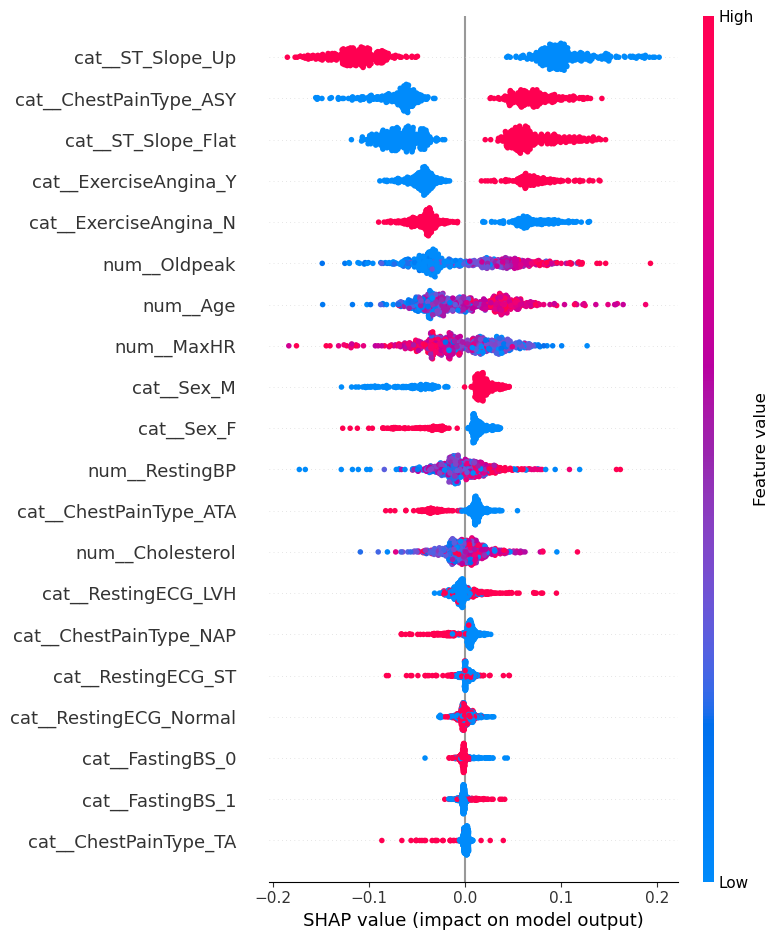

In [20]:
# Step 6: Apply SHAP for feature importance
# Extract the Random Forest model from the pipeline
model = pipeline.named_steps['classifier']

# Use SHAP to explain predictions
explainer = shap.TreeExplainer(model)

# Transform the training data using the pipeline
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Get transformed feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
print("Shape of SHAP values:", np.array(shap_values).shape)
print("Shape of Transformed Data:", X_train_transformed.shape)
# Extract SHAP values for Class 1

shap_values_class_1 = shap_values[:, :, 1]

# Confirm the shape of extracted SHAP values
print("SHAP Values for Class 1 Shape:", shap_values_class_1.shape)
print("Feature Names Length:", len(feature_names))
print("Transformed Data Shape:", X_train_transformed.shape)

# Plot SHAP summary for Class 1
shap.summary_plot(shap_values_class_1, X_train_transformed, feature_names=feature_names)



In [21]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
feature_names = X_test.columns
print("Feature Names:", feature_names)

Feature Names: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [23]:
importances = model.feature_importances_

# Print the feature importances
print("Feature Importances:", importances)

Feature Importances: [0.01971634 0.02403623 0.07428655 0.02149338 0.01184715 0.00880868
 0.00848799 0.00782621 0.0166426  0.01205281 0.01102673 0.07473507
 0.07983555 0.00603454 0.08031255 0.14019439 0.07996225 0.07214136
 0.06870155 0.09675599 0.08510207]


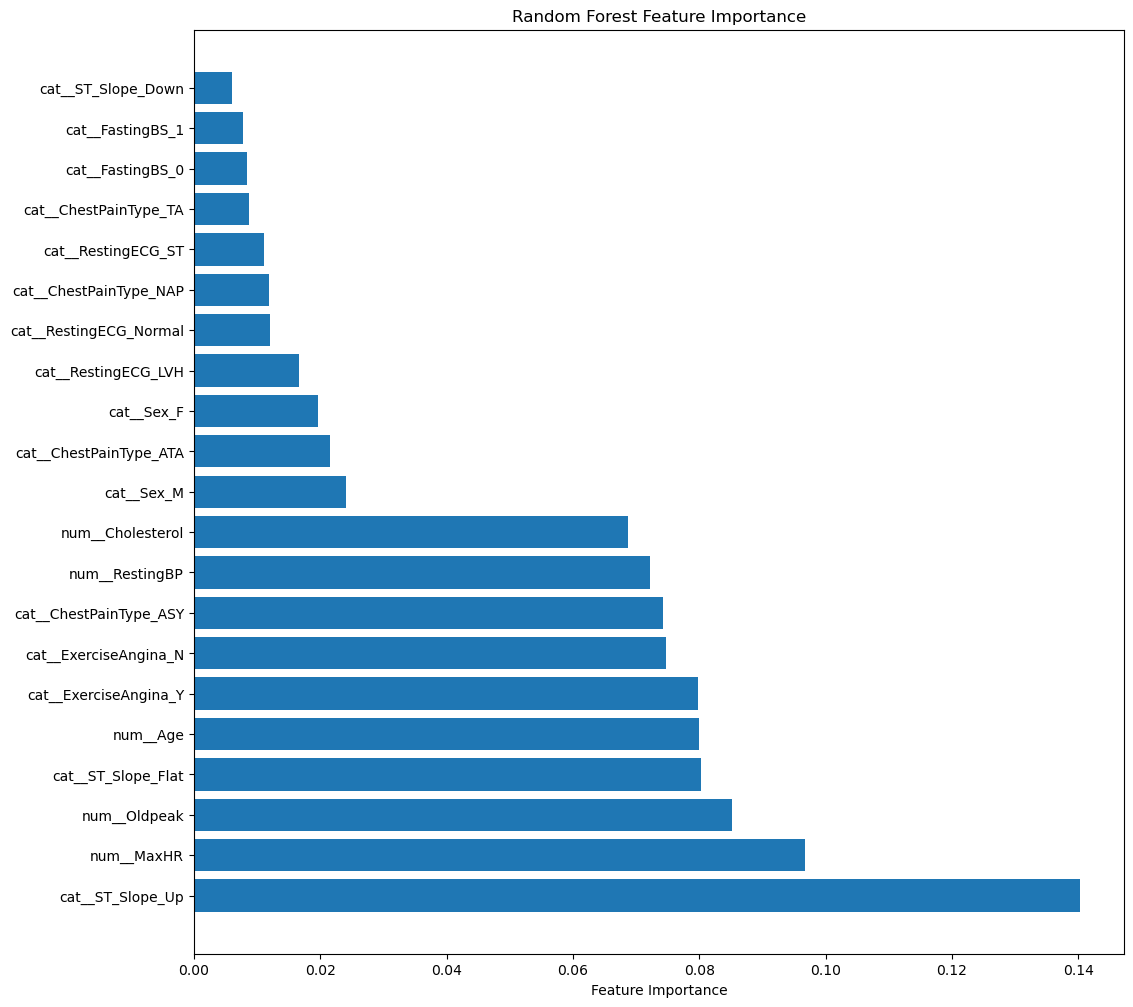

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `importances` comes from the feature importances of a trained RandomForest model
# For example: importances = model.feature_importances_

# If `X` has been preprocessed, make sure you use the transformed feature names
# Get feature names from the model's pipeline or from preprocessor if it's been applied
# This step may differ based on your setup, here’s an example:
try:
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Sort the importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Create the plot
plt.figure(figsize=(12, 12))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), np.array(feature_names)[sorted_idx])  # Ensure feature_names match importances length
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()
